# Análise de dados e visualizações - base IMDB

O levantamento dos filmes existentes atualmente foi feito com base em 81.273 títulos publicados entre dezembro de 1906 e maio de 2020 e catalogados pelo IMDb. Ao longo da análise, considerou-se os países fora os EUA como "estrangeiros".


#### LANÇAMENTOS POR ANO

Entre 2000 e 2017, o número de títulos publicados foi crescente, passando de 1.308 a 3.173, respectivamente (+143% ou +5,35% a.a.). 

Após ligeiro recuo em 2018 para 3.044 (-4%), o número de títulos publicados caiu abruptamente em 2019 para 2.068, queda de 35% desde o pico de 2017 e quantidade inferior à de 2007, representando retorno de mais de uma década no nível de lançamentos da indústria.


#### CLASSIFICAÇÃO POR GÊNERO

Os títulos estão classificados em 1.264 combinações de gêneros com base em 26 gêneros diferentes.

Drama é principal classificação de gênero, com 11.809 títulos (14,5%), e também o gênero mais comum, com 44.404 títulos (54,6%).

A segunda principal classificação de gênero é Comédia, com 7.322 títulos, seguida por, Comédia e Drama (3.822), Drama e Romance (3.252), e Comédia e Romance (2.383).

Depois de Drama, os gêneros mais comuns são Comédia, com 27.873 títulos, Romance (13.379), Ação (12.106), e Suspense (10.814).

Também há títulos classificados como Crime, Terror, Aventura, Mistério, Família, Fantasia, Ficção Científica, Biografia, Guerra, Animação, Musical, Faroeste, etc. 

Por fim, há gêneros com apenas um ou dois títulos nesta base: Documentário, Adulto, Reality-TV, Game-Show e Notícias.


#### CAMPEÕES DE BILHETERIA

Os 10 títulos de maior receita no EUA foram:
- 1 - Star Wars: Episode VII - The Force Awakens (2015)
- 2 - Avengers: Endgame (2019)
- 3 - Avatar (2009)
- 4 - Black Panther (2018)
- 5 - Avengers: Infinity War (2018)
- 6 - Titanic (1997)
- 7 - Jurassic World (2015)
- 8 - The Avengers (2012)
- 9 - Star Wars: Episode VIII - The Last Jedi	(2017)
- 10 - Incredibles 2 (2018)

Com exceção de Titanic, todos são classificados como Ação e Aventura, e apenas Titanic e Avatar não fazem parte de uma franquia.

Com base nisso, títulos que combinem Ação e Aventura parecem ser bastante procurados e títulos da mesma franquia podem ser uma boa sugestão para maratonar.

Os campeões de bilheteria de cada ano são um recorte que também pode indicar títulos bastante procurados, assim como os campeões de bilheteria por gênero.


#### ORIGEM DOS TÍTULOS

Há 4.633 combinações de países de origem dos títulos.

Os países com mais títulos são: EUA (27.490), India (5.540), Reino Unido (3.869), França (2.975) e Japão (2.850).

Incluindo as coproduções, os EUA aparecem como origem de 32.993 títulos. Ou seja, 60% dos títulos são de produção estrangeira.

Há 903 títulos de produção ou coprodução brasileira.


#### IDIOMA DOS TÍTULOS

Há 4.252 combinações de idiomas, quase tantas quanto de países de origem.

O inglês é o idioma de 34.519 títulos e aparece como um dos idiomas em 45.503 títulos. Portanto, 44% dos títulos são falados exclusivamente em idioma estrangeiro.


#### DIRETORES

Os 10 diretores  de maior receita no EUA foram:
- 1 - Steven Spielberg            
- 2 - Michael Bay                 
- 3 - Anthony Russo, Joe Russo    
- 4 - Peter Jackson               
- 5 - Ron Howard                  
- 6 - Robert Zemeckis             
- 7 - Christopher Nolan           
- 8 - Clint Eastwood              
- 9 - James Cameron               
- 10- Tim Burton                  

---

## Imports e pré-configuração

In [5]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

plt.style.use('ggplot')

movies = pd.read_csv('IMDb_movies.csv')
names = pd.read_csv('IMDb_names.csv')
ratings = pd.read_csv('IMDb_ratings.csv')
ratings_movies = pd.merge(ratings, movies[['director','duration','genre','imdb_title_id','title','year']], how='inner', on='imdb_title_id')

In [6]:
movies_genre = movies.assign(genre=movies['genre'].str.split(',')).explode('genre', ignore_index=True)
movies_genre['genre'] = movies_genre['genre'].apply(lambda x: x.strip())

In [7]:
## Filtrando os filmes americanos
imdb_movies_USA = movies[(movies['country']=='USA')]

## Retirando as colunas desnecessárias
imdb_movies_USA = imdb_movies_USA.drop(['imdb_title_id','original_title','year','date_published','genre','duration','language','director',
                                       'writer','production_company','actors','description','avg_vote','votes','worlwide_gross_income',
                                        'metascore','reviews_from_users','reviews_from_critics'],axis=1)
## Retirando valores NaN
imdb_movies_USA = imdb_movies_USA.dropna()

## As duas linhas abaixo verificam se há filmes americanos que não apresentam os seus dados em dólar e que devem ser desconsiderados
for i in imdb_movies_USA['budget']:
    if "$" not in i:
        #print(imdb_movies_USA[imdb_movies_USA['budget']==i])
        imdb_movies_USA = imdb_movies_USA.replace(i,np.nan)
        
imdb_movies_USA = imdb_movies_USA.dropna()
for i in imdb_movies_USA['usa_gross_income']:
    if "$" not in i:
        #print(imdb_movies_USA[imdb_movies_USA['usa_gross_income']==i])
        imdb_movies_USA = imdb_movies_USA.replace(i,np.nan)
        
##### Não foram encontradas receitas que não estejam em dólar americano
imdb_movies_USA.set_index('title')

# As linhas à seguir são códigos para transformar os valores que estão como 'String' para número
n = ""
list_budget = []
for i in imdb_movies_USA['budget']:
    n = ""
    for j in i:
        if j.isdigit() ==True:
            n = n+j
    list_budget.append(int(n))
arr_budget= np.array(list_budget).T

n = ""
list_income = []
for i in imdb_movies_USA['usa_gross_income']:
    n = ""
    for j in i:
        if j.isdigit() ==True:
            n = n+j
    list_income.append(int(n))
arr_income= np.array(list_income).T

dicionario = {'Budget':arr_budget,'Income':arr_income}
df_ROI = pd.DataFrame(index=imdb_movies_USA['title'],data=dicionario)


# Foi encontrado um filme com orçamento igual a 20 dólares e outro com receita de 300 dólares, que serãao desconsiderados
df_ROI = df_ROI.drop('Poltergeist',axis=0)
df_ROI = df_ROI.drop('Zyzzyx Rd',axis=0)

# O cálculo abaixo busca mostrar o retorno para cada dólar investido no filme
df_ROI['ROI'] = df_ROI['Income']/df_ROI['Budget']
df_ROI = df_ROI.sort_values('ROI',ascending=False)


def formatar(x):
    return f'$ {x:,.2f}'.replace(',','_').replace('.',',').replace('_','.')

df_ROI['Budget'] = df_ROI['Budget'].apply(formatar)
df_ROI['Income'] = df_ROI['Income'].apply(formatar)
df_ROI['ROI'] = df_ROI['ROI'].apply(formatar)

---

---

<center><b style="Background-color:Wheat;padding:12px"><font size="6">Top (até 50) filmes por voto popular (acima de 10 mil votos)</b></center><br/>

    
<b style="Background-color:Pink"><i>Essa análise irá apresentar na forma de RANKING a relação de filmes de acordo com as notas do publico</i>

    Para utilizar esta análise, basta informar o ANO INICIAL e o GÊNERO de filme que se quer analisar.

    Para uma consulta mais focada, é apresentado um RANKING com até 50 filmes, e foi determinada uma quantidade de votos mínimos como indicador de relevância do filme.



In [8]:
year = input("Entre com o ano a partir do qual se deseja consultar (1980 por padrão): ")
if year == "":
    year = 1980
else:
    year = int(year)
print("\nLista de gêneros:",movies_genre['genre'].unique().tolist())
genre = input("Entre com o gênero (todos por padrão): ")

cond1 = movies['votes'] > 1e4
cond2 = movies['year'] > year
if genre == "":
    cond3 = True
else:
    cond3 = movies['genre'].str.contains(genre, regex=False)
    
best_per_votes = movies[cond1 & cond2 & cond3].sort_values(by='avg_vote', ascending=False)[:50]
best_per_votes['ranking'] = [i+1 for i in range(best_per_votes.shape[0])]
best_per_votes.set_index(best_per_votes['ranking'], inplace=True)
display(best_per_votes[['title','year','genre','duration','director','avg_vote']])

Entre com o ano a partir do qual se deseja consultar (1980 por padrão): 

Lista de gêneros: ['Biography', 'Crime', 'Drama', 'History', 'Adventure', 'Fantasy', 'Romance', 'War', 'Mystery', 'Horror', 'Western', 'Comedy', 'Family', 'Action', 'Sci-Fi', 'Thriller', 'Sport', 'Animation', 'Musical', 'Music', 'Film-Noir', 'Adult', 'Documentary', 'Reality-TV', 'Game-Show', 'News']
Entre com o gênero (todos por padrão): 


,title,year,genre,duration,director,avg_vote
ranking,,,,,,
1,The Shawshank Redemption,1994,Drama,142,Frank Darabont,9.3
2,Wheels,2014,Drama,115,"Tim Gagliardo, Donavon Warren",9.3
3,Aynabaji,2016,"Crime, Mystery, Thriller",147,Amitabh Reza Chowdhury,9.2
4,Peranbu,2018,Drama,147,"Ram, Amudhavan Karuppiah",9.2
5,Dag II,2016,"Action, Drama, War",135,Alper Caglar,9.0
6,The Dark Knight,2008,"Action, Crime, Drama",152,Christopher Nolan,9.0
7,Maratonci trce pocasni krug,1982,"Comedy, Drama",92,Slobodan Sijan,9.0
8,The Lord of the Rings: The Return of the King,2003,"Adventure, Drama, Fantasy",201,Peter Jackson,8.9
9,Schindler's List,1993,"Biography, Drama, History",195,Steven Spielberg,8.9


---

<center><b style="Background-color:Wheat;padding:12px"><font size="6">Top (até 50) filmes por voto Metacritic (acima de 10 mil votos)</b></center><br/>

<b style="Background-color:Pink"><i>Informações relevantes sobre essa análise:</b></i>

1) Essa análise irá apresentar na forma de RANKING a relação de filmes de acordo com as notas da <i style="color: green">crítica especializada</i>

2) Basta informar o <b>ANO INICIAL</b> e o <b>GÊNERO de filme</b> que se quer analisar.

3) Para uma consulta mais focada, é apresentado o <b><i>RANKING com até 50 filmes</b></i>.


In [6]:
year = input("Entre com o ano a partir do qual se deseja consultar (1980 por padrão): ")
if year == "":
    year = 1980
else:
    year = int(year)
print("\nLista de gêneros:",movies_genre['genre'].unique().tolist())
genre = input("Entre com o gênero (todos por padrão): ")

cond1 = movies['votes'] > 1e4
cond2 = movies['year'] > year
if genre == "":
    cond3 = True
else:
    cond3 = movies['genre'].str.contains(genre, regex=False)
    
best_per_meta = movies[cond1 & cond2 & cond3].sort_values(by='metascore', ascending=False)[:50]
best_per_meta['ranking'] = [i+1 for i in range(best_per_meta.shape[0])]
best_per_meta.set_index(best_per_meta['ranking'], inplace=True)
display(best_per_meta[['title','year','genre','duration','director','metascore']])

Entre com o ano a partir do qual se deseja consultar (1980 por padrão): 

Lista de gêneros: ['Biography', 'Crime', 'Drama', 'History', 'Adventure', 'Fantasy', 'Romance', 'War', 'Mystery', 'Horror', 'Western', 'Comedy', 'Family', 'Action', 'Sci-Fi', 'Thriller', 'Sport', 'Animation', 'Musical', 'Music', 'Film-Noir', 'Adult', 'Documentary', 'Reality-TV', 'Game-Show', 'News']
Entre com o gênero (todos por padrão): 


,title,year,genre,duration,director,metascore
ranking,,,,,,
1,Trois couleurs: Rouge,1994,"Drama, Mystery, Romance",99,Krzysztof Kieslowski,100.0
2,Boyhood,2014,Drama,165,Richard Linklater,100.0
3,Fanny och Alexander,1982,Drama,188,Ingmar Bergman,100.0
4,Moonlight,2016,Drama,111,Barry Jenkins,99.0
5,Pan's Labyrinth,2006,"Drama, Fantasy, War",118,Guillermo del Toro,98.0
6,"4 luni, 3 saptamâni si 2 zile",2007,Drama,113,Cristian Mungiu,97.0
7,My Left Foot: The Story of Christy Brown,1989,"Biography, Drama",103,Jim Sheridan,97.0
8,12 Years a Slave,2013,"Biography, Drama, History",134,Steve McQueen,96.0
9,Ah fei zing zyun,1990,"Crime, Drama, Romance",94,Kar-Wai Wong,96.0


---

<center><b style="Background-color:Wheat;padding:12px"><font size="6"> Média de duração e votos por gênero</b></center><br/>

<p style="background-color:LightSkyBlue;font-family: Arial">Levantamento com a média de duração dos filmes por gênero e sua respectiva média dos votos do público.
    
<b style="Background-color:Pink"><i>Esse levantamento pode servir de parâmetro para:</i>

    1) A avaliação de duração média dos filmes por gênero, pode nos trazer uma informação adicional no momento da seleção de um determinado filme para disponibilizar no catálogo, por exemplo:
    
      1.a) Seleções de filmes com duração MENOR que a média pode interessar ao público que "tem pouco tempo"(por exemplo pessoas que costumam deixar filmes mais longos sem concluir.). Ex. de Categoria: "filmes para quem tem pressa", com duração máxima de 45 minutos..
             
      1.b) Selecões de filmes longos,com duração MAIOR que a média, para atrair o público que tem interesse em "MARATONAR".
                         

    2) Comparar as médias de notas do banco de dados com as avaliações recebidas dos clientes da Netflix por gênero, para perceber, de forma indireta, se as seleções de filmes disponibilizadas aos clientes da Netflix estão em linha com a média geral do gênero ( ou acima ou abaixo ). Em outras palavras, entendemos que se a seleção disponibilizada aos clientes da Netflix for acertiva, as médias de notas dos clientes Netflix tende a ser melhor que a média geral aqui apresentada.


In [7]:
#display(movies_genre.groupby('genre')['duration'].mean().sort_values(ascending=False).reset_index())
display(movies_genre.groupby('genre').agg(
    {
        'duration':'mean',
        #'year':lambda x:round(x.mean(),0),
        #'country':lambda x:x.value_counts().index[0],
        'avg_vote':'mean'
    }
).round(2).sort_values(by='avg_vote',ascending=False))

,duration,avg_vote
genre,,
News,88.00,7.50
Documentary,76.00,7.00
Film-Noir,85.41,6.71
Biography,114.20,6.66
History,117.55,6.58
War,107.26,6.46
Animation,87.43,6.38
Music,101.14,6.28
Musical,109.14,6.28


<b style="Background-color:Pink"><i>Como curiosidade, a média de duração de alguns dos principais gêneros possui uma variação anual muito grande, apesar de no geral ser crescente:</i>

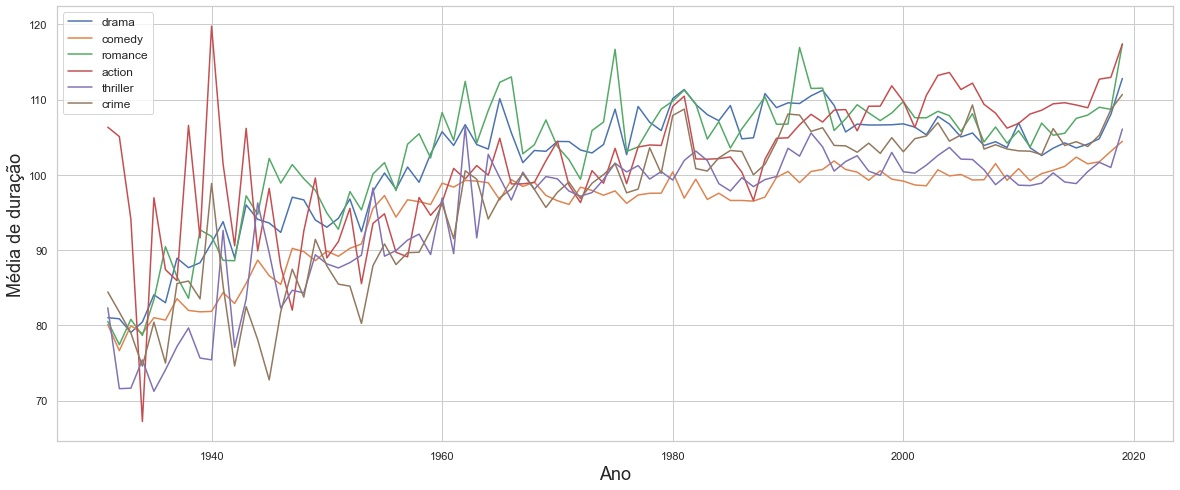

In [9]:
crime = pd.DataFrame(movies_genre[(movies_genre['genre']=='Crime') & (movies_genre['year']>1930)].groupby('year').agg('duration').mean())
drama = pd.DataFrame(movies_genre[(movies_genre['genre']=='Drama') & (movies_genre['year']>1930)].groupby('year').agg('duration').mean())
romance = pd.DataFrame(movies_genre[(movies_genre['genre']=='Romance') & (movies_genre['year']>1930)].groupby('year').agg('duration').mean())
comedy = pd.DataFrame(movies_genre[(movies_genre['genre']=='Comedy') & (movies_genre['year']>1930)].groupby('year').agg('duration').mean())
action = pd.DataFrame(movies_genre[(movies_genre['genre']=='Action') & (movies_genre['year']>1930)].groupby('year').agg('duration').mean())
thriller = pd.DataFrame(movies_genre[(movies_genre['genre']=='Thriller') & (movies_genre['year']>1930)].groupby('year').agg('duration').mean())

main_genres = [drama,comedy,romance,action,thriller,crime]

sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
for g in main_genres:
    ax = sns.lineplot(data=g, x="year", y="duration")

ax.set_xlabel('Ano', fontsize = 18)
ax.set_ylabel('Média de duração', fontsize = 18)
plt.legend(['drama','comedy','romance','action','thriller','crime'], fontsize=12)
plt.show()

<b style="Background-color:Pink"><i>Outra observação a ser feita é que a dispersão de duração dos filmes e das notas médias, não parecem ter muita correlação, como se observa no scatter e no heatmap:</i>

Por voto popular:


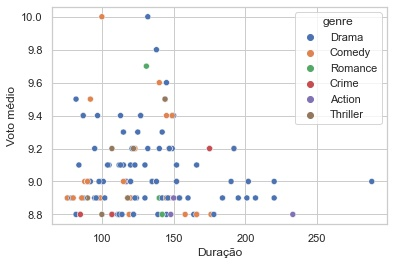

In [10]:
movies_main_genres = movies_genre[movies_genre['genre'].isin(['Drama','Comedy','Romance','Action','Thriller','Crime'])]
movies_main_genres = movies_main_genres.sort_values(by='avg_vote', ascending=False)[:150]
print("Por voto popular:")
ax = sns.scatterplot(data=movies_main_genres, x="duration", y="avg_vote", hue="genre")
ax.set_xlabel('Duração', fontsize = 12)
ax.set_ylabel('Voto médio', fontsize = 12)
plt.show()

Por voto popular:


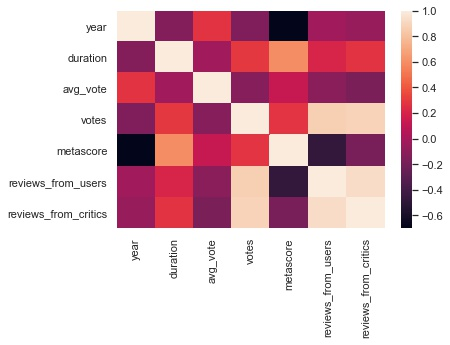

In [11]:
print("Por voto popular:")
sns.heatmap(movies_main_genres.corr())
plt.show()

Por voto Metacritic:


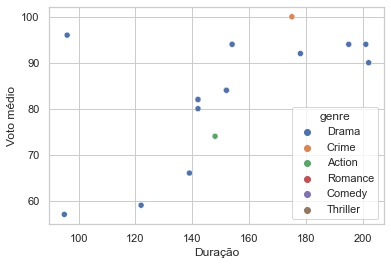

In [12]:
movies_main_genres = movies_main_genres.sort_values(by='metascore', ascending=False)[:150]
print("Por voto Metacritic:")
ax = sns.scatterplot(data=movies_main_genres, x="duration", y="metascore", hue="genre")
ax.set_xlabel('Duração', fontsize = 12)
ax.set_ylabel('Voto médio', fontsize = 12)
plt.show()

Por voto Metacritic:


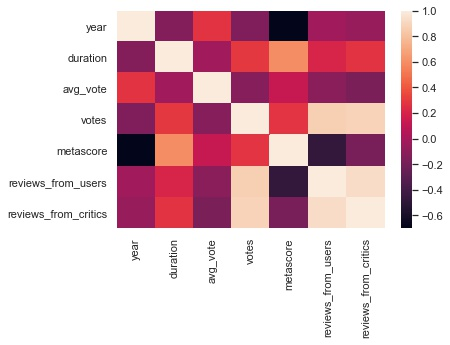

In [13]:
print("Por voto Metacritic:")
sns.heatmap(movies_main_genres.corr())
plt.show()

---

<center><b style="Background-color:Wheat;padding:12px"><font size="6"> Filmes para maratonar e filmes para quem tem pouco tempo</b></center><br/>

<p style="background-color:LightSkyBlue;font-family: Arial">Sugestões de filmes baseadas na lista dos mais indicados e no seu tempo de duração
    
<b style="Background-color:Pink"><i>Tempos de duração foram divididos em 4 quantis, sendo citadas apenas a primeira e última faixa, a depender da seleção de filmes escolhida. Esse levantamento pode servir de parâmetro para sugerir filmes de curta duração e filmes de longa duração:</i>


In [32]:
score = input("Entre com o tipo de crítica pelo qual se deseja consultar [Metacritic/Popular]: ")
if score == "" or score.lower() == "popular":
    score = "avg_vote"
else:
    score = "metascore"
    
year = input("Entre com o ano a partir do qual se deseja consultar (1980 por padrão): ")
if year == "":
    year = 1980
else:
    year = int(year)
print("\nLista de gêneros:",movies_genre['genre'].unique().tolist())
genre = input("Entre com o gênero (todos por padrão): ")

cond1 = movies['votes'] > 1e4
cond2 = movies['year'] > year
if genre == "":
    cond3 = True
else:
    cond3 = movies['genre'].str.contains(genre, regex=False)
    
best_per_votes = movies[cond1 & cond2 & cond3].sort_values(by=score, ascending=False)[:50]
best_per_votes['ranking'] = [i+1 for i in range(best_per_votes.shape[0])]
best_per_votes.set_index(best_per_votes['ranking'], inplace=True)

labels = ['short','medium-short','medium','medium-long','long']
best_per_votes['duration_length'] = pd.qcut(best_per_votes['duration'], 5, labels=labels)
best_per_votes = best_per_votes[['title','year','genre','duration','director',score,'duration_length']]

print("\nFilmes de curta duração:")
display(best_per_votes[best_per_votes['duration_length']=='short'].sort_values(by='duration', ascending=False))

print("\nFilmes de longa duração:")
display(best_per_votes[best_per_votes['duration_length']=='long'].sort_values(by='duration', ascending=False))

Entre com o tipo de crítica pelo qual se deseja consultar [Metacritic/Popular]: 
Entre com o ano a partir do qual se deseja consultar (1980 por padrão): 

Lista de gêneros: ['Biography', 'Crime', 'Drama', 'History', 'Adventure', 'Fantasy', 'Romance', 'War', 'Mystery', 'Horror', 'Western', 'Comedy', 'Family', 'Action', 'Sci-Fi', 'Thriller', 'Sport', 'Animation', 'Musical', 'Music', 'Film-Noir', 'Adult', 'Documentary', 'Reality-TV', 'Game-Show', 'News']
Entre com o gênero (todos por padrão): Horror

Filmes de curta duração:


,title,year,genre,duration,director,avg_vote,duration_length
ranking,,,,,,,
31,A Quiet Place,2018,"Drama, Horror, Sci-Fi",90,John Krasinski,7.5,short
25,Tucker and Dale vs Evil,2010,"Comedy, Horror",89,Eli Craig,7.5,short
17,Zombieland,2009,"Adventure, Comedy, Horror",88,Ruben Fleischer,7.6,short
11,What We Do in the Shadows,2014,"Comedy, Horror",86,"Jemaine Clement, Taika Waititi",7.7,short
32,The Evil Dead,1981,Horror,85,Sam Raimi,7.5,short
8,Evil Dead II,1987,"Comedy, Horror",84,Sam Raimi,7.8,short
39,Pi,1998,"Drama, Horror, Mystery",84,Darren Aronofsky,7.4,short
5,Pâfekuto burû,1997,"Animation, Horror, Mystery",81,Satoshi Kon,8.0,short
30,Army of Darkness,1992,"Comedy, Horror",81,Sam Raimi,7.5,short


Filmes de longa duração:


,title,year,genre,duration,director,avg_vote,duration_length
ranking,,,,,,,
22,Grindhouse,2007,"Action, Horror, Thriller",191,"Robert Rodriguez, Eli Roth",7.5,long
3,The Blue Elephant,2014,"Drama, Horror, Mystery",170,Marwan Hamed,8.1,long
41,Gok-seong,2016,"Horror, Mystery, Thriller",156,Hong-jin Na,7.4,long
12,Doctor Sleep,2019,"Drama, Fantasy, Horror",152,Mike Flanagan,7.7,long
45,It,2017,Horror,135,Andy Muschietti,7.3,long
9,Stree,2018,"Comedy, Horror",128,Amar Kaushik,7.7,long
40,Dracula,1992,Horror,128,Francis Ford Coppola,7.4,long
46,Hereditary,2018,"Drama, Horror, Mystery",127,Ari Aster,7.3,long
38,Tesis,1996,"Horror, Mystery, Thriller",125,Alejandro Amenábar,7.4,long


---

<center><b style="Background-color:Wheat;padding:12px"><font size="6">Diretores-referência por gênero e notas médias</b></center><br/>

<b style="Background-color:Pink"><i>Aqui se pode observar as notas médias, tanto da audiência como do site Metacritic obtida por cada diretor por gênero em que atuou. Esse comparativo pode nos encaminhar na percepção das habilidades de diretores em função do gênero dos filmes em que atuou</i>
    
    Para realizar a consulta, basta escolher o ano inicial a partir do qual quer pesquisar,e obterá a lista com os diretores as respectivas notas em cada gênero em que atuou desde o ano escolhido.
    
    Obs.: Foram considerados os filmes com quantidade de votos acima de 10 mil, a titulo de melhorar a qualidade da análise.
    

In [7]:
year = input("Entre com o ano a partir do qual se deseja consultar (1980 por padrão): ")
if year == "":
    year = 1980
else:
    year = int(year)

cond1 = movies_genre['votes'] > 1e4
cond2 = movies_genre['year'] > year

print("\nBaseado no voto da audiência:")
best_movies_genre_per_votes = movies_genre[cond1 & cond2].sort_values(by='avg_vote', ascending=False)[:50]
display(best_movies_genre_per_votes.pivot_table(
    values='avg_vote',
    columns='genre',
    index='director',
    aggfunc='mean'
).round(2).fillna('-'))
print("\nBaseado no voto do Metacritic:")
best_movies_genre_per_meta = movies_genre[cond1 & cond2].sort_values(by='metascore', ascending=False)[:50]
display(best_movies_genre_per_meta.pivot_table(
    values='metascore',
    columns='genre',
    index='director',
    aggfunc='mean'
).round(2).fillna('-'))

Entre com o ano a partir do qual se deseja consultar (1980 por padrão): 

Baseado no voto da audiência:


genre,Action,Adventure,Biography,Comedy,Crime,Drama,Fantasy,History,Mystery,Romance,Sci-Fi,Thriller,War
director,,,,,,,,,,,,,
Alper Caglar,9.0,-,-,-,-,9.0,-,-,-,-,-,-,9.0
Amitabh Reza Chowdhury,-,-,-,-,9.2,-,-,-,9.2,-,-,9.2,-
Christopher Nolan,8.9,8.8,-,-,9.0,9.0,-,-,-,-,8.8,-,-
David Fincher,-,-,-,-,-,8.8,-,-,-,-,-,-,-
Frank Darabont,-,-,-,-,-,9.3,-,-,-,-,-,-,-
"Gayatri, Pushkar",8.7,-,-,-,8.7,-,-,-,-,-,-,8.7,-
"Lana Wachowski, Lilly Wachowski",-,-,-,-,-,-,-,-,-,-,8.7,-,-
Martin Scorsese,-,-,-,-,8.7,8.7,-,-,-,-,-,-,-
Peter Jackson,-,8.8,-,-,-,8.8,8.8,-,-,-,-,-,-



Baseado no voto do Metacritic:


genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Mystery,Romance,Sci-Fi,Thriller,War
director,,,,,,,,,,,,,,,
Akira Kurosawa,96.0,-,-,-,-,-,96.0,-,-,-,-,-,-,-,-
Alfonso Cuarón,-,-,-,-,-,-,96.0,-,-,-,-,-,96.0,96.0,-
Andrew Stanton,-,-,95.0,-,-,-,-,95.0,-,-,-,-,-,-,-
Asghar Farhadi,-,-,-,-,-,-,95.0,-,-,-,-,-,-,-,-
Barry Jenkins,-,-,-,-,-,-,99.0,-,-,-,-,-,-,-,-
Bong Joon Ho,-,-,-,-,95.0,-,95.0,-,-,-,-,-,-,95.0,-
"Brad Bird, Jan Pinkava",-,96.0,96.0,-,96.0,-,-,-,-,-,-,-,-,-,-
Cristian Mungiu,-,-,-,-,-,-,97.0,-,-,-,-,-,-,-,-
David Fincher,-,-,-,-,-,-,95.0,-,-,-,-,-,-,-,-


---

<center><b style="Background-color:Wheat;padding:12px"><font size="6">Contagem de diretores nos filmes mais bem avaliados</b></center><br/>

<b style="Background-color:Pink"><i>Esta análise busca listar os diretores mais recorrentes e a quantidade de filme dirigidos,  comparando ainda as notas médias da audiência com as notas médias do site Metacritic (Metascore)</i>

In [8]:
directors = pd.concat([best_movies_genre_per_votes['director'].value_counts(),best_movies_genre_per_meta['director'].value_counts()], axis=1)
directors.columns=['Quantidade de filmes (voto médio)', 'Quantidade de filmes (Metascore)']
display(directors.fillna(0).astype(int))

,Quantidade de filmes (voto médio),Quantidade de filmes (Metascore)
Peter Jackson,9,0
Christopher Nolan,6,0
Amitabh Reza Chowdhury,3,0
"Gayatri, Pushkar",3,0
Alper Caglar,3,0
Sundar C.,3,0
Steven Spielberg,3,0
Todd Phillips,3,0
Ram Kumar,3,0
Slobodan Sijan,2,0


<center><b style="Background-color:Wheat;padding:12px"><font size="6">Contagem de atores nos filmes mais bem avaliados e busca por filmes por ator</b></center><br/>

<b style="Background-color:Pink"><i>Aqui procuramos destacar os atores mais recorrentes na lista de melhores filmes, já obtida anteriormente.</i></b>

In [14]:
try:
    best_per_votes
    best_per_meta
except NameError:
    cond1 = movies['votes'] > 1e4
    cond2 = movies['year'] > 1980
    best_per_meta = movies[cond1 & cond2].sort_values(by='metascore', ascending=False)[:50]
    best_per_meta['ranking'] = [i+1 for i in range(best_per_meta.shape[0])]
    best_per_meta.set_index(best_per_meta['ranking'], inplace=True)
    best_per_votes = movies[cond1 & cond2].sort_values(by='avg_vote', ascending=False)[:50]
    best_per_votes['ranking'] = [i+1 for i in range(best_per_votes.shape[0])]
    best_per_votes.set_index(best_per_votes['ranking'], inplace=True)


names.dropna(subset=['known_for_titles'], inplace=True)
names.dropna(subset=['primary_profession'], inplace=True)
names = names[names['primary_profession'].str.contains('actor')]

names_movies = names.assign(known_for_titles=names['known_for_titles'].str.split(',')).explode('known_for_titles')
names_movies['known_for_titles'] = names_movies['known_for_titles'].apply(lambda x: x.strip())

cols = names_movies.columns.to_list()
cols[19] = 'imdb_title_id'
names_movies.columns = cols

names_movies = pd.merge(names_movies, movies[['title','imdb_title_id']], how='inner', on='imdb_title_id')
best_actors_votes = names_movies[names_movies['title'].isin(best_per_votes['title'].to_list())]
best_actors_meta = names_movies[names_movies['title'].isin(best_per_meta['title'].to_list())]
s1 = best_actors_votes['name'].value_counts()
s2 = best_actors_meta['name'].value_counts()

In [15]:
print('Relação de atores presentes nos melhores filmes:')
best_actors_votes['name'].value_counts()

actors = pd.concat([s1[s1>1],s2[s2>1]], axis=1)
actors.columns=['Quantidade de filmes (voto médio)', 'Quantidade de filmes (Metascore)']

pd.set_option('display.max_rows', None)
display(actors.fillna(0).astype(int))
pd.reset_option("display.max_rows")

Relação de atores presentes nos melhores filmes:


,Quantidade de filmes (voto médio),Quantidade de filmes (Metascore)
Andrew Lesnie,3,2
Sean Astin,3,2
Andrew Beattie,3,2
Elijah Wood,3,2
Dominic Monaghan,3,2
Hugo Weaving,3,2
Billy Boyd,3,2
John Rhys-Davies,3,2
Ian McKellen,3,2
Steven Sutherland,2,0


<b style="Background-color:Pink"><i>Abaixo, é possível pesquisar pelo nome de um ator ou atriz e obter uma relação dos principais filmes em que eles atuaram, de forma a ampliar o leque de recomendações.</i>

In [17]:
ator = input("Entre com o nome de algum ator/atriz: ")
if ator not in names_movies['name'].unique():
    print('Erro ao encontrar o ator/atriz. Favor tente novamente com o nome completo.')
else:
    names_movies_filtrado = names_movies[names_movies['name'].str.contains(ator)]
    result = names_movies_filtrado[['name','title']]
    print('Ator:', ator.title())
    filmes = movies[movies['title'].isin(result['title'].to_list())]
    pd.set_option('display.max_colwidth', 0)
    display(filmes[['title','year','genre','duration','actors','avg_vote','metascore']].sort_values(by='metascore', ascending=False)[:10])
    pd.reset_option("display.max_colwidth")

Entre com o nome de algum ator/atriz: Orlando Bloom
Ator: Orlando Bloom


,title,year,genre,duration,actors,avg_vote,metascore
33198,The Lord of the Rings: The Return of the King,2003,"Adventure, Drama, Fantasy",201,"Noel Appleby, Ali Astin, Sean Astin, David Aston, John Bach, Sean Bean, Cate Blanchett, Orlando Bloom, Billy Boyd, Sadwyn Brophy, Alistair Browning, Marton Csokas, Richard Edge, Jason Fitch, Bernard Hill",8.9,94.0
30456,The Lord of the Rings: The Fellowship of the Ring,2001,"Adventure, Drama, Fantasy",178,"Alan Howard, Noel Appleby, Sean Astin, Sala Baker, Sean Bean, Cate Blanchett, Orlando Bloom, Billy Boyd, Marton Csokas, Megan Edwards, Michael Elsworth, Mark Ferguson, Ian Holm, Christopher Lee, Lawrence Makoare",8.8,92.0
40736,Kingdom of Heaven,2005,"Action, Adventure, Drama",144,"Martin Hancock, Michael Sheen, Nathalie Cox, Eriq Ebouaney, Jouko Ahola, David Thewlis, Liam Neeson, Philip Glenister, Orlando Bloom, Bronson Webb, Kevin McKidd, Nikolaj Coster-Waldau, Steven Robertson, Marton Csokas, Alexander Siddig",7.2,63.0
40912,Pirates of the Caribbean: The Curse of the Black Pearl,2003,"Action, Adventure, Fantasy",143,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Keira Knightley, Jack Davenport, Jonathan Pryce, Lee Arenberg, Mackenzie Crook, Damian O'Hare, Giles New, Angus Barnett, David Bailie, Michael Berry Jr., Isaac C. Singleton Jr., Kevin McNally",8.0,63.0


---

<center><b style="Background-color:Wheat;padding:12px"><font size="6">Filmes favoritos por sexo e faixa etária</b></center><br/>

<b style="Background-color:Pink"><i>Esta análise busca apresentar a prefência da audiência com base no sexo e faixa etária da audiência.

In [9]:
specifications = ['allgenders_0age_avg_vote','allgenders_18age_avg_vote','allgenders_30age_avg_vote','allgenders_45age_avg_vote','males_allages_avg_vote', 'males_0age_avg_vote', 'males_18age_avg_vote','males_30age_avg_vote','males_45age_avg_vote','females_allages_avg_vote','females_0age_avg_vote', 'females_18age_avg_vote', 'females_30age_avg_vote','females_45age_avg_vote']
index = [i+1 for i in range(0,14)]
mapper = {ind: spec for ind, spec in zip(index, specifications)}

traducoes = ['Todos os gêneros (0-18 anos)','Todos os gêneros (18-30 anos)','Todos os gêneros (30-45 anos)','Todos os gêneros (45+ anos)',
            'Homens (todas as idades)','Homens (0-18 anos)','Homens (18-30 anos)','Homens (30-45 anos)','Homens (45+ anos)',
            'Mulheres (todas as idades)','Mulheres (0-18 anos)','Mulheres (18-30 anos)','Mulheres (30-45 anos)','Mulheres (45+ anos)']
mapper_trad = {ind: spec for ind, spec in zip(index, traducoes)}

In [13]:
year = input("Entre com o ano a partir do qual se deseja consultar (1980 por padrão): ")
if year == "":
    year = 1980
else:
    year = int(year)
    
for index,key in mapper_trad.items():
    print(index, ": " + key)
    
index = int(input("Selecione a opção correspondente à faixa etária e sexo desejados: "))

cond1 = ratings_movies[mapper[index]] >= 8.0
cond2 = ratings_movies['total_votes'] >= 2e4
cond3 = ratings_movies['year'] >= year
ratings_filtered = ratings_movies[cond1 & cond2 & cond3]

ratings_filtered = ratings_filtered[['title', mapper[index]]].sort_values(by=mapper[index], ascending=False)[:50]
ratings_filtered.columns=['Título','Voto médio']
display(ratings_filtered.set_index('Título'))

Entre com o ano a partir do qual se deseja consultar (1980 por padrão): 
1 : Todos os gêneros (0-18 anos)
2 : Todos os gêneros (18-30 anos)
3 : Todos os gêneros (30-45 anos)
4 : Todos os gêneros (45+ anos)
5 : Homens (todas as idades)
6 : Homens (0-18 anos)
7 : Homens (18-30 anos)
8 : Homens (30-45 anos)
9 : Homens (45+ anos)
10 : Mulheres (todas as idades)
11 : Mulheres (0-18 anos)
12 : Mulheres (18-30 anos)
13 : Mulheres (30-45 anos)
14 : Mulheres (45+ anos)
Selecione a opção correspondente à faixa etária e sexo desejados: 12


,Voto médio
Título,
Nada a Perder,9.8
Dag II,9.4
The Shawshank Redemption,9.3
Schindler's List,9.0
La vita è bella,9.0
The Lord of the Rings: The Return of the King,9.0
Marighella,9.0
Ayla: The Daughter of War,8.9
The Lion King,8.9


<b style="Background-color:Pink"><i>Um fato curioso é que as mulheres costumam em média dar notas mais altas do que os homens, ao avaliarem os filmes, como podemos observar no gráfico de barras abaixo, para os 16 gêneros mais representativos:

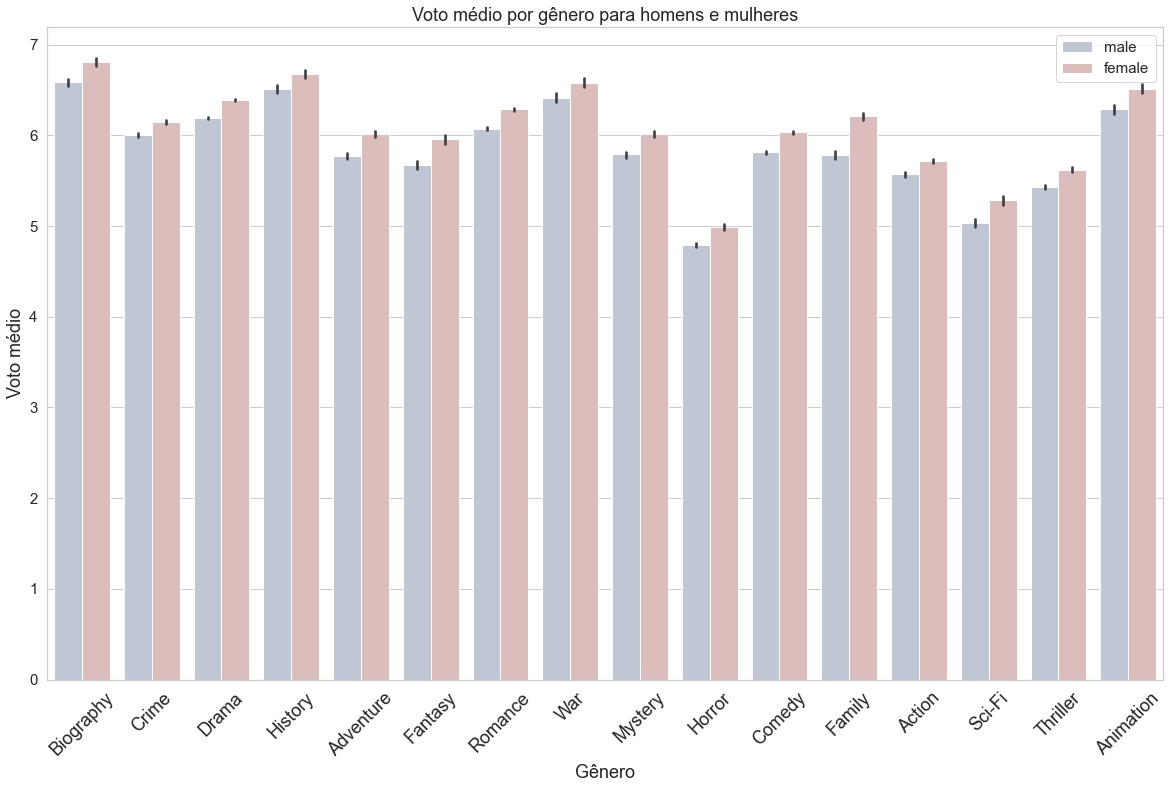

In [18]:
ratings_movies = pd.merge(ratings, movies[['director','duration','genre','imdb_title_id','title','year']], how='inner', on='imdb_title_id')
ratings_movies_genres = ratings_movies.assign(genre=ratings_movies['genre'].str.split(',')).explode('genre', ignore_index=True)
ratings_movies_genres['genre'] = ratings_movies_genres['genre'].apply(lambda x: x.strip())

# 16 gêneros mais relevantes
ratings_movies_genres = ratings_movies_genres[ratings_movies_genres['genre'].isin(movies_genre['genre'].value_counts()[:16].index)]
ratings_movies_genres_melt = pd.melt(ratings_movies_genres,
    id_vars=['imdb_title_id','genre','title'],
    value_vars=['males_allages_avg_vote', 'females_allages_avg_vote'],
    var_name='sex',
    value_name='avg_vote'
)
ratings_movies_genres_melt.replace('males_allages_avg_vote','male', inplace=True)
ratings_movies_genres_melt.replace('females_allages_avg_vote','female', inplace=True)

sns.set_theme(style="whitegrid")
plt.subplots(figsize=(20,12))
ax = sns.barplot(data=ratings_movies_genres_melt, x='genre', y='avg_vote', hue='sex', palette="vlag")
ax.set_title('Voto médio por gênero para homens e mulheres', fontsize = 18)
ax.set_xlabel('Gênero', fontsize = 18)
ax.set_ylabel('Voto médio', fontsize = 18)
plt.xticks(size=18)
plt.yticks(size=15)
plt.legend(fontsize=15)
ax.tick_params(axis='x', rotation=45)
plt.show()

---

<center><b style="Background-color:Wheat;padding:12px"><font size="6">Filmes mais rentáveis</b></center><br/>

<b style="Background-color:Pink"><i>Esta análise busca apresentar os filmes mais rentáveis americanos. Filmes estrangeiros foram desconsiderados, por apresentarem dados da moeda local e por não se ter conhecimento do câmbio na época

## A tabela abaixo mostra o ranking dos filmes mais rentáveis americanos

In [5]:
df_ROI = df_ROI.reset_index()
lista_ranking = np.array([i+1 for i in range(len(df_ROI.index))])

df_ROI = df_ROI.set_index(lista_ranking)
display(df_ROI.head(10))

,title,Budget,Income,ROI
1,Paranormal Activity,"$ 15.000,00","$ 107.918.810,00","$ 7.194,59"
2,The Blair Witch Project,"$ 60.000,00","$ 140.539.099,00","$ 2.342,32"
3,The Gallows,"$ 100.000,00","$ 22.764.410,00","$ 227,64"
4,Joe,"$ 106.000,00","$ 19.319.254,00","$ 182,26"
5,Go Fish,"$ 15.000,00","$ 2.405.285,00","$ 160,35"
6,American Graffiti,"$ 777.000,00","$ 115.000.000,00","$ 148,01"
7,Halloween,"$ 325.000,00","$ 47.000.000,00","$ 144,62"
8,Snow White and the Seven Dwarfs,"$ 1.499.000,00","$ 184.925.486,00","$ 123,37"
9,Rocky,"$ 960.000,00","$ 117.235.147,00","$ 122,12"
10,Clerks,"$ 27.000,00","$ 3.151.130,00","$ 116,71"


---

<center><b style="Background-color:Wheat;padding:12px"><font size="6">Distribuição dos filmes mais rentáveis</b></center><br/>

<b style="Background-color:Pink"><i>Esta análise busca apresentar alguns dados gráficos sobre os filmes mais rentáveis. Será necessária uma nova formatação dos valores para se conseguir formar os gráficos

In [6]:
dicionario = {'Budget':arr_budget,'Income':arr_income}
df_ROI_numbers = pd.DataFrame(index=imdb_movies_USA['title'],data=dicionario)
df_ROI_numbers = df_ROI_numbers.drop('Poltergeist',axis=0)
df_ROI_numbers = df_ROI_numbers.drop('Zyzzyx Rd',axis=0)
df_ROI_numbers['ROI'] = df_ROI_numbers['Income']/df_ROI_numbers['Budget']
df_ROI_numbers = df_ROI_numbers.sort_values('ROI',ascending=False)

df_ROI_numbers = df_ROI_numbers.merge(movies, how='inner', on='title').drop(['original_title','date_published','language','production_company','actors','description','avg_vote','votes','worlwide_gross_income',
                                        'reviews_from_users','reviews_from_critics','budget','usa_gross_income','country'],axis=1)

# Explodindo os valores por gênero
df_ROI_numbers = df_ROI_numbers.fillna('-')
df_ROI_numbers['genre'] = df_ROI_numbers['genre'].str.split(',')
df_ROI_numbers_expanded = df_ROI_numbers.explode('genre', )

# É necessária uma formatação desses valores descritos, retirando-se os espaços
df_ROI_numbers_expanded['genre'] = df_ROI_numbers_expanded['genre'].apply(lambda x: x.strip())

# Como existem muitos genêros de filmes foram escolhidos os 5 principais gêneros
movies_genres = df_ROI_numbers_expanded[(df_ROI_numbers_expanded['genre']=='Comedy') 
                                        | (df_ROI_numbers_expanded['genre']=='Drama')
                                       | (df_ROI_numbers_expanded['genre']=='Romance')
                                        | (df_ROI_numbers_expanded['genre']=='Action')
                                        | (df_ROI_numbers_expanded['genre']=='Crime')]


<b style="Background-color:Pink"><i>O gráfico à seguir busca mostrar a distribuição das rentabilidade dos filmes pelos 5 gêneros mais populares americanos


Text(0.5, 1.0, 'Distribuição do ROI por gênero de filme - excluindo outliers')

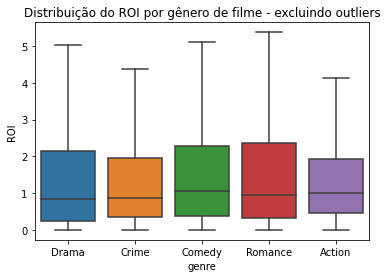

In [24]:
graf2 = sns.boxplot(data=movies_genres,x='genre',y='ROI',showfliers=False)
graf2.set_title('Distribuição do ROI por gênero de filme - excluindo outliers')

Pelo boxplot podemos verificar que filmes de crime e ação tem uma distribuição menor de rentabilidade com um 3º quartil abaixo de 2, apesar da mediana de todos os generos estarem bem próximos a 1. Filmes de romance e ação apresentam um 3º quartil maior do que dois.

<b style="Background-color:Pink"><i>O gráfico à seguir busca mostrar uma relação entre o orçamento e a receita do filme

Text(0.5, 1.0, 'Relação entre a receita e o orçamento do filme')

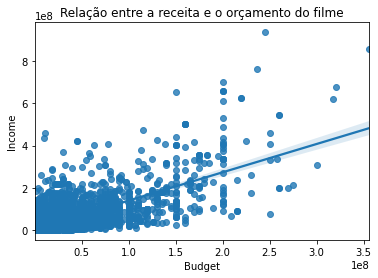

In [25]:
graf3 = sns.regplot(data=df_ROI_numbers, x='Budget', y='Income')
graf3.set_title("Relação entre a receita e o orçamento do filme")

<b style="Background-color:Pink"><i>Para buscar alguma relação melhor, serão excluídos os outliers pelo método quantile

In [9]:
df_ROI_numbers_no_outliers = df_ROI_numbers[df_ROI_numbers['Budget'].between(df_ROI_numbers['Budget'].quantile(
    .15),df_ROI_numbers['Budget'].quantile(0.85))]

In [10]:
df_ROI_numbers_no_outliers = df_ROI_numbers[df_ROI_numbers['Income'].between(df_ROI_numbers['Income'].quantile(
    .15),df_ROI_numbers['Income'].quantile(0.85))]

Text(0.5, 1.0, 'Relação entre receita x orçamento - sem outliers')

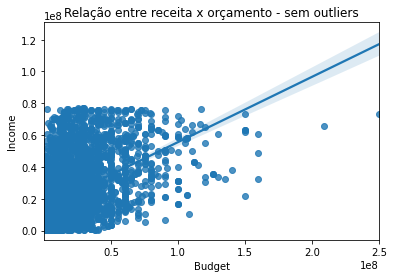

In [29]:
graf4 = sns.regplot(data=df_ROI_numbers_no_outliers, x='Budget', y='Income')
graf4.set_title("Relação entre receita x orçamento - sem outliers")

 Não foi possível verificar uma relação muito concreta entre o orçamento e a receita do filme. Por isso faremos um jointplot

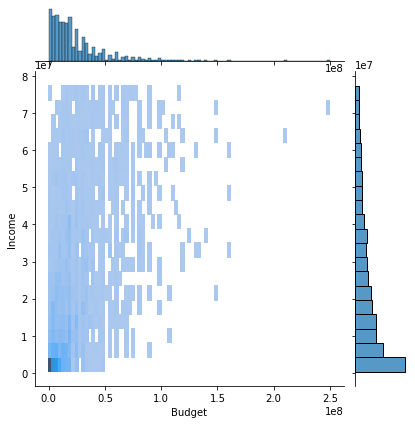

In [12]:
graf_5 = sns.jointplot(data=df_ROI_numbers_no_outliers,x='Budget',y='Income',kind='hist')

Pelo gráfico acima podemos ver que a maioria dos filmes possui orçamento de até US 500.000.000,00, mas a receita deles pode variar bastante de US 20.000.000,00 até US 75.000.0000